# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `project_grade_category`

In [8]:
grades = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
grade_list = []
for i in grades:
    if 'Grades' in i.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            i=i.replace('Grades','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            i = i.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    grade_list.append(i.strip())
    
project_data['project_grade_category'] = grade_list

from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))


## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:07<00:00, 860.06it/s]


In [18]:
project_data['essay'] = preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also

from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 17264.25it/s]


In [20]:
project_data['project_title'] = preprocessed_titles

<h2>Removing unnecessary columns </h2>

In [21]:
#Removing unnecessary columns
# drop columns fron pandas dataframe https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe

project_data.drop(['project_essay_1','project_essay_2', 'project_essay_3', 'project_essay_4'], axis=1, inplace=True)

<h3>Handling missing values</h3>

In [22]:
#https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

project_data[project_data['teacher_prefix'].isnull()]
#Handle null values in pandas https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

project_data['teacher_prefix'].fillna( method ='ffill', inplace = True)

<h3>Counting the words in Essay</h3>

In [23]:
essay_word_count = []
for ess in project_data["essay"] :
    c = len(ess.split())
    essay_word_count.append(c)
project_data['essay_word_count'] = essay_word_count    

<h3>Counting the words in Title</h3>

In [24]:
title_word_count = []
for tit in project_data["project_title"] :
    c = len(tit.split())
    title_word_count.append(c)
project_data['title_word_count'] = title_word_count    

<h3>Computing Sentiment Scores</h3>

In [25]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer()
sentiment_scores_essays = []    
for sentance in tqdm(project_data['essay'].values):
    ss = sid.polarity_scores(sentance)
    sentiment_scores_essays.append(ss)
scores = pd.DataFrame(sentiment_scores_essays)       

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [07:04<00:00, 257.12it/s]


In [26]:
project_data["pos"] = scores["pos"]
project_data["neg"] = scores["neg"]
project_data["neu"] = scores["neu"]
project_data["compound"] = scores["compound"]

## 1.5 Preparing data for models

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'essay_word_count',
       'title_word_count', 'pos', 'neg', 'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [28]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'essay_word_count',
       'title_word_count', 'pos', 'neg', 'neu', 'compound', 'price',
       'quantity'],
      dtype='object')

In [29]:
# move columns in pandas dataframe https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe/35321983
project_data = project_data[[c for c in project_data if c not in ['project_is_approved']] 
       + ['project_is_approved']]
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'essay_word_count', 'title_word_count',
       'pos', 'neg', 'neu', 'compound', 'price', 'quantity',
       'project_is_approved'],
      dtype='object')

# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [30]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
#importing necessary modules

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score

# Splitting the data into X , Y labels

# create design matrix X and target vector y
X = np.array(project_data.iloc[:, :-1]) # end index is exclusive
y = np.array(project_data['project_is_approved']) # showing you two ways of indexing a pandas df
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3, stratify = y_1)
    

In [31]:
print(len(X_tr))
print(len(X_cv))
print(len(X_test))


53531
22942
32775


In [32]:
X_tr = pd.DataFrame(data=X_tr[0:,0:], columns=project_data.columns[0:-1])
X_cv = pd.DataFrame(data=X_cv[0:,0:], columns=project_data.columns[0:-1])
X_test = pd.DataFrame(data=X_test[0:,0:], columns=project_data.columns[0:-1])

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<h2>One Hot Encoding for Categorial features<h2/>

In [33]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if neededtHuWDX6yizwIhai
    # c. X-axis label
    # d. Y-axis label
print("="*25+"encoding categorical features"+"="*25)    
#Vectorizing categorical data : 
# 1 Clean_Categories

# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_tr['clean_categories'].values)

categories_one_hot_train = vectorizer.transform(X_tr['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",categories_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",categories_one_hot_cv.shape)
print("="*100)
   

=========================encoding categorical features=========================
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of train matrix after one hot encodig  (53531, 9)
Shape of test matrix after one hot encodig  (32775, 9)
Shape of cv matrix after one hot encodig  (22942, 9)


In [34]:
# 2 clean_subcategories

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_tr['clean_subcategories'].values)
print(vectorizer.get_feature_names())

sub_categories_one_hot_train = vectorizer.transform(X_tr['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)

print("Shape of train matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",sub_categories_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",sub_categories_one_hot_cv.shape)
print("="*100)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of train matrix after one hot encodig  (53531, 30)
Shape of test matrix after one hot encodig  (32775, 30)
Shape of cv matrix after one hot encodig  (22942, 30)


In [35]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [36]:
# 3 school_state

vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()),lowercase=False, binary=True)
vectorizer.fit(X_tr['school_state'].values)
print(vectorizer.get_feature_names())
school_state_one_hot_train = vectorizer.transform(X_tr['school_state'].values)
school_state_one_hot_test = vectorizer.transform(X_test['school_state'].values)
school_state_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)

print("Shape of train matrix after one hot encodig ",school_state_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",school_state_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",school_state_one_hot_cv.shape)
print("="*100)


['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of train matrix after one hot encodig  (53531, 51)
Shape of test matrix after one hot encodig  (32775, 51)
Shape of cv matrix after one hot encodig  (22942, 51)


In [37]:
my_counter = Counter()
for teacher in project_data['teacher_prefix'].values:
    my_counter.update(teacher.split())
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [38]:
# 4 teacher_prefix

#one hot encoding for teacher_prefix feature

vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()),lowercase=False, binary=True)
vectorizer.fit(X_tr['teacher_prefix'].values)
print(vectorizer.get_feature_names())
teacher_prefix_one_hot_train = vectorizer.transform(X_tr['teacher_prefix'].values)
teacher_prefix_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values)
teacher_prefix_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values)

print("Shape of train matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",teacher_prefix_one_hot_cv.shape)
print("="*100)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of train matrix after one hot encodig  (53531, 5)
Shape of test matrix after one hot encodig  (32775, 5)
Shape of cv matrix after one hot encodig  (22942, 5)


In [39]:
print(teacher_prefix_one_hot_train.toarray()[0:5,:])

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [40]:
# 5 project_grade_category

vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()),lowercase=False, binary=True)
vectorizer.fit(X_tr['project_grade_category'].values)
print(vectorizer.get_feature_names())
project_grade_one_hot_train = vectorizer.transform(X_tr['project_grade_category'].values)
project_grade_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values)
project_grade_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values)

print("Shape of train matrix after one hot encodig ",project_grade_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",project_grade_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",project_grade_one_hot_cv.shape)
print("="*100)

['9-12', '6-8', '3-5', 'PreK-2']
Shape of train matrix after one hot encodig  (53531, 4)
Shape of test matrix after one hot encodig  (32775, 4)
Shape of cv matrix after one hot encodig  (22942, 4)


<h2>Encoding numerical features<b/>

In [41]:
print("_"*25+"encoding numerical features"+"_"*25) 
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

#1 price
price_scalar = StandardScaler()
price_scalar.fit(X_tr['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_tr['price'].values.reshape(-1, 1))
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
price_standardized_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))


print("Shape of train matrix ",price_standardized_train.shape)
print("Shape of test matrix ",price_standardized_test.shape)
print("Shape of cv matrix ",price_standardized_cv.shape)
print("="*100)


_________________________encoding numerical features_________________________
Mean : 298.3808426892829, Standard deviation : 356.6414506792702
Shape of train matrix  (53531, 1)
Shape of test matrix  (32775, 1)
Shape of cv matrix  (22942, 1)


In [42]:
previous_project_scalar = StandardScaler()
previous_project_scalar.fit(X_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {previous_project_scalar.mean_[0]}, Standard deviation : {np.sqrt(previous_project_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previous_project_standardized_train = previous_project_scalar.transform(X_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
previous_project_standardized_test = previous_project_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
previous_project_standardized_cv = previous_project_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

print("Shape of train matrix  ",previous_project_standardized_train.shape)
print("Shape of test matrix  ",previous_project_standardized_test.shape)
print("Shape of cv matrix  ",previous_project_standardized_cv.shape)

Mean : 11.163475369412117, Standard deviation : 27.66427020504765
Shape of train matrix   (53531, 1)
Shape of test matrix   (32775, 1)
Shape of cv matrix   (22942, 1)


In [43]:
essay_word_scalar = StandardScaler()
essay_word_scalar.fit(X_tr['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {essay_word_scalar.mean_[0]}, Standard deviation : {np.sqrt(essay_word_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
essay_word_standardized_train = essay_word_scalar.transform(X_tr['essay_word_count'].values.reshape(-1, 1))
essay_word_standardized_test = essay_word_scalar.transform(X_test['essay_word_count'].values.reshape(-1, 1))
essay_word_standardized_cv = essay_word_scalar.transform(X_cv['essay_word_count'].values.reshape(-1, 1))

print("Shape of train matrix ",essay_word_standardized_train.shape)
print("Shape of test matrix  ",essay_word_standardized_test.shape)
print("Shape of cv matrix ",essay_word_standardized_cv.shape)

Mean : 151.49750611795034, Standard deviation : 39.04735941446581
Shape of train matrix  (53531, 1)
Shape of test matrix   (32775, 1)
Shape of cv matrix  (22942, 1)


In [44]:
title_word_scalar = StandardScaler()
title_word_scalar.fit(X_tr['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {title_word_scalar.mean_[0]}, Standard deviation : {np.sqrt(title_word_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
title_word_standardized_train = title_word_scalar.transform(X_tr['title_word_count'].values.reshape(-1, 1))
title_word_standardized_test = title_word_scalar.transform(X_test['title_word_count'].values.reshape(-1, 1))
title_word_standardized_cv = title_word_scalar.transform(X_cv['title_word_count'].values.reshape(-1, 1))

print("Shape of train matrix ",title_word_standardized_train.shape)
print("Shape of test matrix  ",title_word_standardized_test.shape)
print("Shape of cv matrix ",title_word_standardized_cv.shape)

Mean : 4.33223739515421, Standard deviation : 1.7836826898412486
Shape of train matrix  (53531, 1)
Shape of test matrix   (32775, 1)
Shape of cv matrix  (22942, 1)


In [45]:
pos_scalar = StandardScaler()
pos_scalar.fit(X_tr['pos'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {pos_scalar.mean_[0]}, Standard deviation : {np.sqrt(pos_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
pos_standardized_train = pos_scalar.transform(X_tr['pos'].values.reshape(-1, 1))
pos_standardized_test = pos_scalar.transform(X_test['pos'].values.reshape(-1, 1))
pos_standardized_cv = pos_scalar.transform(X_cv['pos'].values.reshape(-1, 1))

print("Shape of train matrix ",pos_standardized_train.shape)
print("Shape of test matrix  ",pos_standardized_test.shape)
print("Shape of cv matrix ",pos_standardized_cv.shape)

Mean : 0.26637099998131925, Standard deviation : 0.07377281603799392
Shape of train matrix  (53531, 1)
Shape of test matrix   (32775, 1)
Shape of cv matrix  (22942, 1)


In [46]:
neu_scalar = StandardScaler()
neu_scalar.fit(X_tr['pos'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {neu_scalar.mean_[0]}, Standard deviation : {np.sqrt(neu_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
neu_standardized_train = neu_scalar.transform(X_tr['neu'].values.reshape(-1, 1))
neu_standardized_test = neu_scalar.transform(X_test['neu'].values.reshape(-1, 1))
neu_standardized_cv = neu_scalar.transform(X_cv['neu'].values.reshape(-1, 1))

print("Shape of train matrix ",neu_standardized_train.shape)
print("Shape of test matrix  ",neu_standardized_test.shape)
print("Shape of cv matrix ",neu_standardized_cv.shape)

Mean : 0.26637099998131925, Standard deviation : 0.07377281603799392
Shape of train matrix  (53531, 1)
Shape of test matrix   (32775, 1)
Shape of cv matrix  (22942, 1)


In [47]:
neg_scalar = StandardScaler()
neg_scalar.fit(X_tr['pos'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {neg_scalar.mean_[0]}, Standard deviation : {np.sqrt(neg_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
neg_standardized_train = neg_scalar.transform(X_tr['neg'].values.reshape(-1, 1))
neg_standardized_test = neg_scalar.transform(X_test['neg'].values.reshape(-1, 1))
neg_standardized_cv = neg_scalar.transform(X_cv['neg'].values.reshape(-1, 1))

print("Shape of train matrix ",neg_standardized_train.shape)
print("Shape of test matrix  ",neg_standardized_test.shape)
print("Shape of cv matrix ",neg_standardized_cv.shape)

Mean : 0.26637099998131925, Standard deviation : 0.07377281603799392
Shape of train matrix  (53531, 1)
Shape of test matrix   (32775, 1)
Shape of cv matrix  (22942, 1)


In [48]:
compound_scalar = StandardScaler()
compound_scalar.fit(X_tr['pos'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {compound_scalar.mean_[0]}, Standard deviation : {np.sqrt(compound_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
compound_standardized_train = compound_scalar.transform(X_tr['compound'].values.reshape(-1, 1))
compound_standardized_test = compound_scalar.transform(X_test['compound'].values.reshape(-1, 1))
compound_standardized_cv = compound_scalar.transform(X_cv['compound'].values.reshape(-1, 1))

print("Shape of train matrix ",compound_standardized_train.shape)
print("Shape of test matrix  ",compound_standardized_test.shape)
print("Shape of cv matrix ",compound_standardized_cv.shape)

Mean : 0.26637099998131925, Standard deviation : 0.07377281603799392
Shape of train matrix  (53531, 1)
Shape of test matrix   (32775, 1)
Shape of cv matrix  (22942, 1)


In [49]:
quantity_scalar = StandardScaler()
quantity_scalar.fit(X_tr['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized_train = quantity_scalar.transform(X_tr['quantity'].values.reshape(-1, 1))
quantity_standardized_test = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
quantity_standardized_cv = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))

print("Shape of train matrix ",quantity_standardized_train.shape)
print("Shape of test matrix  ",quantity_standardized_test.shape)
print("Shape of cv matrix ",quantity_standardized_cv.shape)

Mean : 17.097214698025443, Standard deviation : 26.93954470387181
Shape of train matrix  (53531, 1)
Shape of test matrix   (32775, 1)
Shape of cv matrix  (22942, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [50]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
print("_"*25+"Essay BOW"+"_"*25)    
vectorizer = CountVectorizer(min_df=10, ngram_range=(1, 2), max_features=5000)
vectorizer.fit(X_tr['essay'])
essay_bow_train = vectorizer.transform(X_tr['essay'])
essay_bow_test = vectorizer.transform(X_test['essay'])
essay_bow_cv = vectorizer.transform(X_cv['essay'])
print("Shape of train matrix after one hot encodig ",essay_bow_train.shape)
print("Shape of test matrix after one hot encodig ",essay_bow_test.shape)
print("Shape of cv matrix after one hot encodig ",essay_bow_cv.shape)
print("="*100)
print("_"*25+"Project_Title BOW"+"_"*25)
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_tr['project_title'])
title_bow_train = vectorizer.transform(X_tr['project_title'])
title_bow_test = vectorizer.transform(X_test['project_title'])
title_bow_cv = vectorizer.transform(X_cv['project_title'])
print("Shape of train matrix after one hot encodig ",title_bow_train.shape)
print("Shape of test matrix after one hot encodig ",title_bow_test.shape)
print("Shape of cv matrix after one hot encodig ",title_bow_cv.shape)

_________________________Essay BOW_________________________
Shape of train matrix after one hot encodig  (53531, 5000)
Shape of test matrix after one hot encodig  (32775, 5000)
Shape of cv matrix after one hot encodig  (22942, 5000)
_________________________Project_Title BOW_________________________
Shape of train matrix after one hot encodig  (53531, 2191)
Shape of test matrix after one hot encodig  (32775, 2191)
Shape of cv matrix after one hot encodig  (22942, 2191)


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
print("_"*25+"Essay TFIDF"+"_"*25)
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1, 2), max_features=5000)
vectorizer.fit(X_tr['essay'])
essay_tfidf_train = vectorizer.transform(X_tr['essay'])
essay_tfidf_test = vectorizer.transform(X_test['essay'])
essay_tfidf_cv = vectorizer.transform(X_cv['essay'])
print("Shape of train matrix after one hot encodig ",essay_tfidf_train.shape)
print("Shape of test matrix after one hot encodig ",essay_tfidf_test.shape)
print("Shape of cv matrix after one hot encodig ",essay_tfidf_cv.shape)
print("="*100)
print("_"*25+"Project_Title TFIDF"+"_"*25)
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit_transform(X_tr['project_title'])
title_tfidf_train = vectorizer.transform(X_tr['project_title'])
title_tfidf_test = vectorizer.transform(X_test['project_title'])
title_tfidf_cv = vectorizer.transform(X_cv['project_title'])
print("Shape of train matrix after one hot encodig ",title_tfidf_train.shape)
print("Shape of test matrix after one hot encodig ",title_tfidf_test.shape)
print("Shape of cv matrix after one hot encodig ",title_tfidf_cv.shape)

_________________________Essay TFIDF_________________________
Shape of train matrix after one hot encodig  (53531, 5000)
Shape of test matrix after one hot encodig  (32775, 5000)
Shape of cv matrix after one hot encodig  (22942, 5000)
_________________________Project_Title TFIDF_________________________
Shape of train matrix after one hot encodig  (53531, 2191)
Shape of test matrix after one hot encodig  (32775, 2191)
Shape of cv matrix after one hot encodig  (22942, 2191)


In [52]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [53]:
words = []
for i in X_tr['essay']:
    words.extend(i.split(' '))

for i in X_tr['project_title']:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

#import pickle
#with open('./My Drive/glove_vectors', 'wb') as f:
   # pickle.dump(words_courpus, f)


all the words in the coupus 8341722
the unique words in the coupus 44489
The number of words that are present in both glove vectors and our coupus 28991 ( 65.164 %)
word 2 vec length 28991


<h2>Encoding Essay column using AVG WORD2VEC</h2>

In [54]:
# Similarly you can vectorize for title also
print("_"*25+"Essay AVG_W2V"+"_"*25)
essay_avg_w2v_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_tr['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v_train.append(vector)

print(len(essay_avg_w2v_train))
print(len(essay_avg_w2v_train[0]))

_________________________Essay AVG_W2V_________________________


100%|██████████████████████████████████████████████████████████████████████████| 53531/53531 [00:36<00:00, 1448.29it/s]


53531
300


In [55]:
# Similarly you can vectorize for title also
print("_"*25+"Essay AVG_W2V"+"_"*25)
essay_avg_w2v_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v_test.append(vector)

print(len(essay_avg_w2v_test))
print(len(essay_avg_w2v_test[0]))

_________________________Essay AVG_W2V_________________________


100%|██████████████████████████████████████████████████████████████████████████| 32775/32775 [00:20<00:00, 1566.65it/s]


32775
300


In [56]:
# Similarly you can vectorize for title also
print("_"*25+"Essay AVG_W2V"+"_"*25)
essay_avg_w2v_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v_cv.append(vector)

print(len(essay_avg_w2v_cv))
print(len(essay_avg_w2v_cv[0]))

_________________________Essay AVG_W2V_________________________


100%|██████████████████████████████████████████████████████████████████████████| 22942/22942 [00:15<00:00, 1470.99it/s]


22942
300


<h2>Encoding Project_title column using AVG WORD2VEC</h2>

In [57]:
print("_"*25+"Title AVG_W2V"+"_"*25)
title_avg_w2v_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_tr['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v_train.append(vector)

print(len(title_avg_w2v_train))
print(len(title_avg_w2v_train[0]))

_________________________Title AVG_W2V_________________________


100%|█████████████████████████████████████████████████████████████████████████| 53531/53531 [00:02<00:00, 23727.55it/s]


53531
300


In [58]:
print("_"*25+"Title AVG_W2V"+"_"*25)
title_avg_w2v_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v_test.append(vector)

print(len(title_avg_w2v_test))
print(len(title_avg_w2v_test[0]))

_________________________Title AVG_W2V_________________________


100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:01<00:00, 28850.67it/s]


32775
300


In [59]:
print("_"*25+"Title AVG_W2V"+"_"*25)
title_avg_w2v_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v_cv.append(vector)

print(len(title_avg_w2v_cv))
print(len(title_avg_w2v_cv[0]))

_________________________Title AVG_W2V_________________________


100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 26309.33it/s]


22942
300


<h2>Encoding Essay column using TFIDF WORD2VEC</h2>

In [60]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_tr['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
essay_tfidf_w2v_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_tr['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_train.append(vector)

print(len(essay_tfidf_w2v_train))
print(len(essay_tfidf_w2v_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 53531/53531 [04:18<00:00, 207.25it/s]


53531
300


In [61]:
essay_tfidf_w2v_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_test.append(vector)

print(len(essay_tfidf_w2v_test))
print(len(essay_tfidf_w2v_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 32775/32775 [02:39<00:00, 205.62it/s]


32775
300


In [62]:
essay_tfidf_w2v_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_cv.append(vector)

print(len(essay_tfidf_w2v_cv))
print(len(essay_tfidf_w2v_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22942/22942 [01:52<00:00, 204.65it/s]


22942
300


<h2>Encoding Project_title column using TFIDF WORD2VEC</h2>

In [63]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_tr['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
title_tfidf_w2v_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_tr['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_train.append(vector)

print(len(title_tfidf_w2v_train))
print(len(title_tfidf_w2v_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 53531/53531 [00:04<00:00, 11749.58it/s]


53531
300


In [64]:
title_tfidf_w2v_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_test.append(vector)

print(len(title_tfidf_w2v_test))
print(len(title_tfidf_w2v_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:02<00:00, 12014.31it/s]


32775
300


In [65]:
title_tfidf_w2v_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_cv.append(vector)

print(len(title_tfidf_w2v_cv))
print(len(title_tfidf_w2v_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:01<00:00, 11540.25it/s]


22942
300


<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<b> Set 1: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`) </b>

In [66]:
# Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)

from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((school_state_one_hot_train,categories_one_hot_train, sub_categories_one_hot_train, teacher_prefix_one_hot_train, project_grade_one_hot_train,essay_bow_train,title_bow_train, price_standardized_train,previous_project_standardized_train))
X_cv = hstack((school_state_one_hot_cv,categories_one_hot_cv, sub_categories_one_hot_cv, teacher_prefix_one_hot_cv, project_grade_one_hot_cv,essay_bow_cv,title_bow_cv, price_standardized_cv,previous_project_standardized_cv))
X_test = hstack((school_state_one_hot_test,categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test, project_grade_one_hot_test,essay_bow_test,title_bow_test, price_standardized_test,previous_project_standardized_test))
X_tr = X_tr.tocsr()
X_cv = X_cv.tocsr()
X_test = X_test.tocsr()

In [67]:
print(X_tr.shape , y_tr.shape)
print(X_cv.shape , y_cv.shape)
print(X_test.shape , y_test.shape)

(53531, 7292) (53531,)
(22942, 7292) (22942,)
(32775, 7292) (32775,)


In [68]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [70]:
import math

C = [0.0001, 0.001, 0.01, 0.1, 1.0, 10,100, 1000, 10000]
logC = list(map(lambda x : math.log10(x), C))

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [20:08<00:00, 259.51s/it]


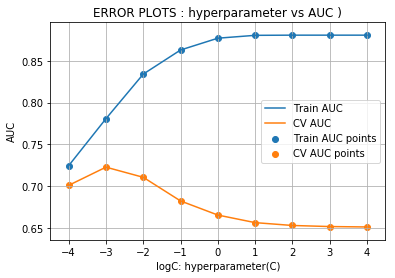

In [71]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

for i in tqdm(C):
    neigh = LogisticRegression(C=i, class_weight='balanced', n_jobs=-1)
    neigh.fit(X_tr, y_tr)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(logC, train_auc, label='Train AUC')
plt.plot(logC, cv_auc, label='CV AUC')

plt.scatter(logC, train_auc, label='Train AUC points')
plt.scatter(logC, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("logC: hyperparameter(C)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS : hyperparameter vs AUC )")
plt.grid()
plt.show()


<b> In the above case the hyperparameter is choosen to be C=0.001 because at C=0.001 the cv_auc is maximum and the distance between train_auc and cv_auc is less. If the C is further increased it may lead to underfit state. <b/>

In [72]:
for i in range(len(train_auc)):
    print(C[i])
    print(logC[i])
    print(train_auc[i]-cv_auc[i])

0.0001
-4.0
0.023531057288868173
0.001
-3.0
0.05797739464873808
0.01
-2.0
0.1234327451144197
0.1
-1.0
0.1805360255823727
1.0
0.0
0.21153159370295826
10
1.0
0.2240168523472157
100
2.0
0.22762741379975182
1000
3.0
0.22891912232454825
10000
4.0
0.22940284504932607


In [73]:
best_c1 = 0.001

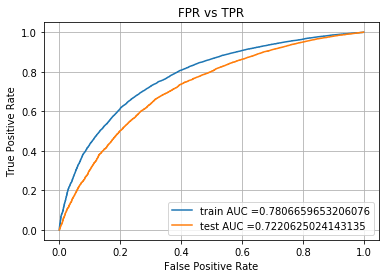

In [74]:
from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(C=best_c1, class_weight='balanced', n_jobs=-1)
neigh.fit(X_tr, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("FPR vs TPR")
plt.grid()
plt.show()

In [75]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [76]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t1 = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_tr, predict_with_best_t(y_train_pred, best_t1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t1)))

the maximum value of tpr*(1-fpr) 0.5095698618164657 for threshold 0.506
Train confusion matrix
[[ 5955  2150]
 [13921 31505]]
Test confusion matrix
[[ 3308  1655]
 [ 8962 18850]]


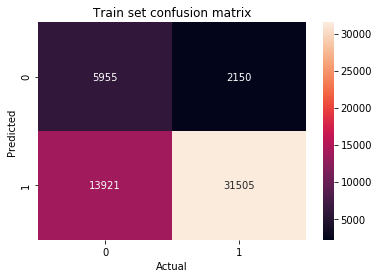

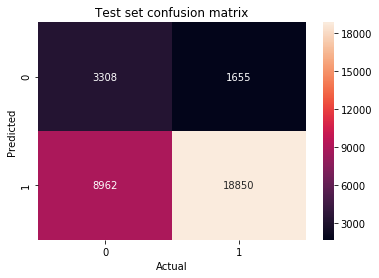

In [77]:
# Heatmap for train set confusion matrix(Select K best)
heatmap_train = sns.heatmap(confusion_matrix(y_tr, predict_with_best_t(y_train_pred,best_t1)), annot=True, fmt="d")
plt.title("Train set confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Heatmap for test set confusion matrix(Select K best)
heatmap_train = sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t1)), annot=True, fmt="d")
plt.title("Test set confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

<b> Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`) </b>

In [78]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((school_state_one_hot_train,categories_one_hot_train, sub_categories_one_hot_train, teacher_prefix_one_hot_train, project_grade_one_hot_train,essay_tfidf_train,title_tfidf_train, price_standardized_train,previous_project_standardized_train))
X_cv = hstack((school_state_one_hot_cv,categories_one_hot_cv, sub_categories_one_hot_cv, teacher_prefix_one_hot_cv, project_grade_one_hot_cv,essay_tfidf_cv,title_tfidf_cv, price_standardized_cv,previous_project_standardized_cv))
X_test = hstack((school_state_one_hot_test,categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test, project_grade_one_hot_test,essay_tfidf_test,title_tfidf_test, price_standardized_test,previous_project_standardized_test))
X_tr = X_tr.tocsr()
X_cv = X_cv.tocsr()
X_test = X_test.tocsr()
print(X_tr.shape , y_tr.shape)
print(X_cv.shape , y_cv.shape)
print(X_test.shape , y_test.shape)

(53531, 7292) (53531,)
(22942, 7292) (22942,)
(32775, 7292) (32775,)


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [09:59<00:00, 139.04s/it]


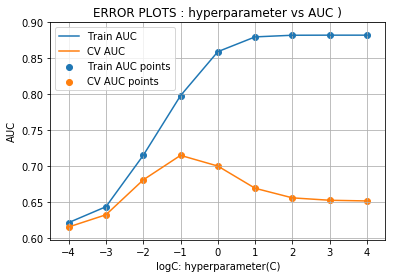

In [79]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

for i in tqdm(C):
    neigh = LogisticRegression(C=i, class_weight='balanced', n_jobs=-1)
    neigh.fit(X_tr, y_tr)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(logC, train_auc, label='Train AUC')
plt.plot(logC, cv_auc, label='CV AUC')

plt.scatter(logC, train_auc, label='Train AUC points')
plt.scatter(logC, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("logC: hyperparameter(C)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS : hyperparameter vs AUC )")
plt.grid()
plt.show()


<b> In the above case the hyperparameter is choosen to be C=0.1 because at C=0.1 the cv_auc is maximum and the distance between train_auc and cv_auc is less. If the C is further increased it may lead to underfit state. <b/>

In [80]:
for i in range(len(train_auc)):
    print(C[i])
    print(logC[i])
    print(train_auc[i]-cv_auc[i])

0.0001
-4.0
0.006072402252759845
0.001
-3.0
0.011188874291097273
0.01
-2.0
0.03407977609560042
0.1
-1.0
0.08302495722889502
1.0
0.0
0.15904247141282768
10
1.0
0.2104680471816044
100
2.0
0.2260544147164718
1000
3.0
0.22950079418491354
10000
4.0
0.23044258368319337


In [81]:
best_c2 = 0.1

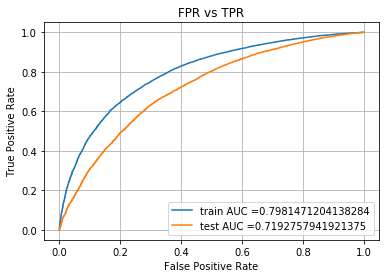

In [82]:
from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(C=best_c2, class_weight='balanced', n_jobs=-1)
neigh.fit(X_tr, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("FPR vs TPR")
plt.grid()
plt.show()

In [83]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t2 = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_tr, predict_with_best_t(y_train_pred, best_t2)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t2)))

the maximum value of tpr*(1-fpr) 0.5283643826040212 for threshold 0.49
Train confusion matrix
[[ 5821  2284]
 [12007 33419]]
Test confusion matrix
[[ 3021  1942]
 [ 7937 19875]]


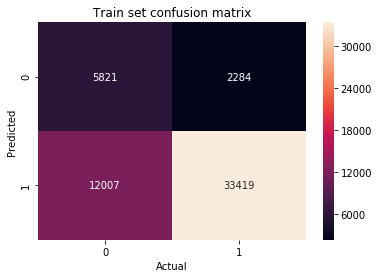

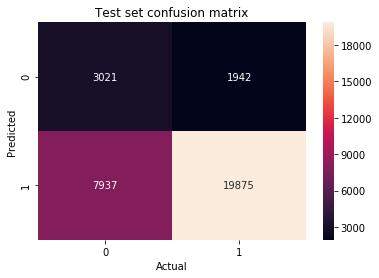

In [84]:
# Heatmap for train set confusion matrix(Select K best)
heatmap_train = sns.heatmap(confusion_matrix(y_tr, predict_with_best_t(y_train_pred,best_t2)), annot=True, fmt="d")
plt.title("Train set confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Heatmap for test set confusion matrix(Select K best)
heatmap_train = sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t2)), annot=True, fmt="d")
plt.title("Test set confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

<b> Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V) <b/>

In [85]:
# Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((school_state_one_hot_train,categories_one_hot_train, sub_categories_one_hot_train, teacher_prefix_one_hot_train, project_grade_one_hot_train,essay_avg_w2v_train,title_avg_w2v_train, price_standardized_train,previous_project_standardized_train))
X_cv = hstack((school_state_one_hot_cv,categories_one_hot_cv, sub_categories_one_hot_cv, teacher_prefix_one_hot_cv, project_grade_one_hot_cv,essay_avg_w2v_cv,title_avg_w2v_cv, price_standardized_cv,previous_project_standardized_cv))
X_test = hstack((school_state_one_hot_test,categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test, project_grade_one_hot_test,essay_avg_w2v_test,title_avg_w2v_test, price_standardized_test,previous_project_standardized_test))
X_tr = X_tr.tocsr()
X_cv = X_cv.tocsr()
X_test = X_test.tocsr()
print(X_tr.shape , y_tr.shape)
print(X_cv.shape , y_cv.shape)
print(X_test.shape , y_test.shape)

(53531, 701) (53531,)
(22942, 701) (22942,)
(32775, 701) (32775,)


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [09:08<00:00, 89.81s/it]


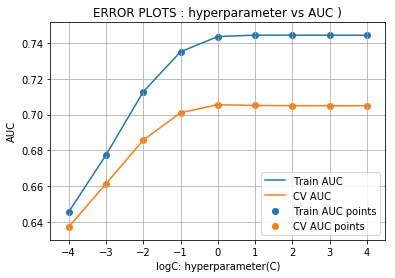

In [86]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

for i in tqdm(C):
    neigh = LogisticRegression(C=i, class_weight='balanced', n_jobs=-1)
    neigh.fit(X_tr, y_tr)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(logC, train_auc, label='Train AUC')
plt.plot(logC, cv_auc, label='CV AUC')

plt.scatter(logC, train_auc, label='Train AUC points')
plt.scatter(logC, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("logC: hyperparameter(C)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS : hyperparameter vs AUC )")
plt.grid()
plt.show()


<b> In the above case the hyperparameter is choosen to be C=1 because at C=1 the cv_auc is maximum and the distance between train_auc and cv_auc is less. If the C is further increased the cv_auc almost remains same. <b/>

In [87]:
for i in range(len(train_auc)):
    print(C[i])
    print(logC[i])
    print(train_auc[i]-cv_auc[i])

0.0001
-4.0
0.00843389851729115
0.001
-3.0
0.0161132663417477
0.01
-2.0
0.02707375759191144
0.1
-1.0
0.034173231248214364
1.0
0.0
0.03817162705801125
10
1.0
0.03940767743580842
100
2.0
0.03951524610693746
1000
3.0
0.03952844566655478
10000
4.0
0.03952988410012237


In [88]:
best_c3 = 1

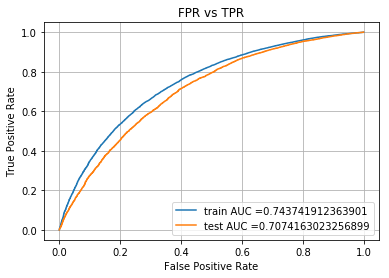

In [89]:
from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(C=best_c3, class_weight='balanced', n_jobs=-1)
neigh.fit(X_tr, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("FPR vs TPR")
plt.grid()
plt.show()

In [90]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t3 = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_tr, predict_with_best_t(y_train_pred, best_t3)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t3)))

the maximum value of tpr*(1-fpr) 0.4668641691065888 for threshold 0.494
Train confusion matrix
[[ 5530  2575]
 [14343 31083]]
Test confusion matrix
[[ 3151  1812]
 [ 9068 18744]]


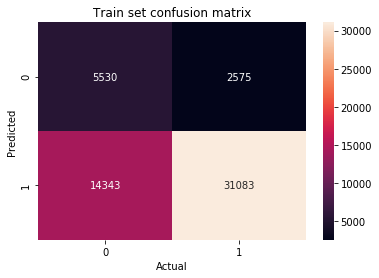

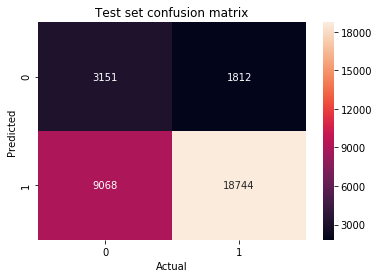

In [91]:
# Heatmap for train set confusion matrix(Select K best)
heatmap_train = sns.heatmap(confusion_matrix(y_tr, predict_with_best_t(y_train_pred,best_t3)), annot=True, fmt="d")
plt.title("Train set confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Heatmap for test set confusion matrix(Select K best)
heatmap_train = sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t3)), annot=True, fmt="d")
plt.title("Test set confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

<b> Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V) <b/>

In [92]:
# Set 4: categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)

from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((school_state_one_hot_train,categories_one_hot_train, sub_categories_one_hot_train, teacher_prefix_one_hot_train, project_grade_one_hot_train,essay_tfidf_w2v_train,title_tfidf_w2v_train, price_standardized_train,previous_project_standardized_train))
X_cv = hstack((school_state_one_hot_cv,categories_one_hot_cv, sub_categories_one_hot_cv, teacher_prefix_one_hot_cv, project_grade_one_hot_cv,essay_tfidf_w2v_cv,title_tfidf_w2v_cv, price_standardized_cv,previous_project_standardized_cv))
X_test = hstack((school_state_one_hot_test,categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test, project_grade_one_hot_test,essay_tfidf_w2v_test,title_tfidf_w2v_test, price_standardized_test,previous_project_standardized_test))
X_tr = X_tr.tocsr()
X_cv = X_cv.tocsr()
X_test = X_test.tocsr()
print(X_tr.shape , y_tr.shape)
print(X_cv.shape , y_cv.shape)
print(X_test.shape , y_test.shape)


(53531, 701) (53531,)
(22942, 701) (22942,)
(32775, 701) (32775,)


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [06:36<00:00, 60.12s/it]


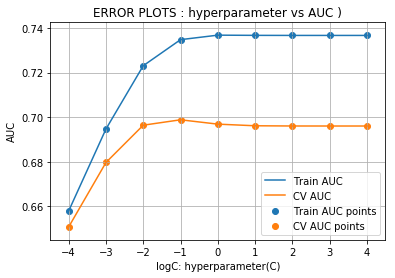

In [93]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

for i in tqdm(C):
    neigh = LogisticRegression(C=i, class_weight='balanced', n_jobs=-1)
    neigh.fit(X_tr, y_tr)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(logC, train_auc, label='Train AUC')
plt.plot(logC, cv_auc, label='CV AUC')

plt.scatter(logC, train_auc, label='Train AUC points')
plt.scatter(logC, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("logC: hyperparameter(C)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS : hyperparameter vs AUC )")
plt.grid()
plt.show()


<b> In the above case the hyperparameter is choosen to be C=0.1 because at C=0.1 the cv_auc is maximum and the distance between train_auc and cv_auc is less. If the C is further increased the train_auc increases and cv_auc decreases which leads to the underfit state <b/>

In [94]:
for i in range(len(train_auc)):
    print(C[i])
    print(logC[i])
    print(train_auc[i]-cv_auc[i])

0.0001
-4.0
0.007177436971694817
0.001
-3.0
0.015020838970281836
0.01
-2.0
0.02669735346027724
0.1
-1.0
0.03597079908721601
1.0
0.0
0.03993819305426294
10
1.0
0.04057916226802416
100
2.0
0.04064603624105634
1000
3.0
0.040653867051676396
10000
4.0
0.040655396873548466


In [95]:
best_c4 = 0.1

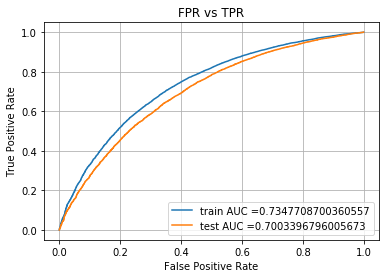

In [96]:
from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(C=best_c4, class_weight='balanced', n_jobs=-1)
neigh.fit(X_tr, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("FPR vs TPR")
plt.grid()
plt.show()

In [97]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t4 = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_tr, predict_with_best_t(y_train_pred, best_t4)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t4)))

the maximum value of tpr*(1-fpr) 0.4577024036733563 for threshold 0.483
Train confusion matrix
[[ 5406  2699]
 [14254 31172]]
Test confusion matrix
[[ 3069  1894]
 [ 8993 18819]]


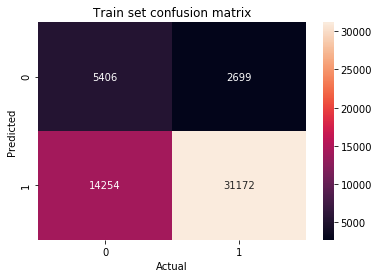

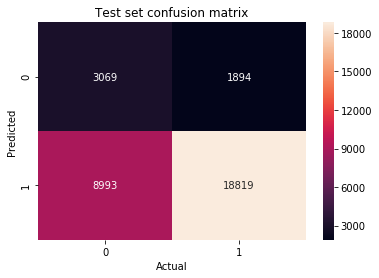

In [98]:
# Heatmap for train set confusion matrix(Select K best)
heatmap_train = sns.heatmap(confusion_matrix(y_tr, predict_with_best_t(y_train_pred,best_t4)), annot=True, fmt="d")
plt.title("Train set confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Heatmap for test set confusion matrix(Select K best)
heatmap_train = sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t4)), annot=True, fmt="d")
plt.title("Test set confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

In [99]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((school_state_one_hot_train,categories_one_hot_train, sub_categories_one_hot_train, teacher_prefix_one_hot_train, project_grade_one_hot_train,essay_word_standardized_train, title_word_standardized_train, pos_standardized_train, neu_standardized_train, neg_standardized_train, compound_standardized_train, quantity_standardized_train, price_standardized_train,previous_project_standardized_train))
X_cv = hstack((school_state_one_hot_cv,categories_one_hot_cv, sub_categories_one_hot_cv, teacher_prefix_one_hot_cv, project_grade_one_hot_cv,essay_word_standardized_cv, title_word_standardized_cv, pos_standardized_cv, neu_standardized_cv, neg_standardized_cv, compound_standardized_cv, quantity_standardized_cv, price_standardized_cv,previous_project_standardized_cv))
X_test = hstack((school_state_one_hot_test,categories_one_hot_test, sub_categories_one_hot_test, teacher_prefix_one_hot_test, project_grade_one_hot_test,essay_word_standardized_test, title_word_standardized_test, pos_standardized_test, neu_standardized_test, neg_standardized_test, compound_standardized_test, quantity_standardized_test, price_standardized_test,previous_project_standardized_test))
X_tr = X_tr.tocsr()
X_cv = X_cv.tocsr()
X_test = X_test.tocsr()
print(X_tr.shape , y_tr.shape)
print(X_cv.shape , y_cv.shape)
print(X_test.shape , y_test.shape)


(53531, 108) (53531,)
(22942, 108) (22942,)
(32775, 108) (32775,)


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:21<00:00,  3.56s/it]


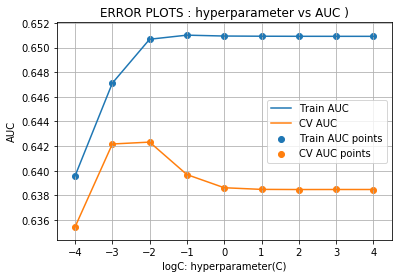

In [100]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []

for i in tqdm(C):
    neigh = LogisticRegression(C=i, class_weight='balanced', n_jobs=-1)
    neigh.fit(X_tr, y_tr)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cv)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_tr,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(logC, train_auc, label='Train AUC')
plt.plot(logC, cv_auc, label='CV AUC')

plt.scatter(logC, train_auc, label='Train AUC points')
plt.scatter(logC, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("logC: hyperparameter(C)")
plt.ylabel("AUC")
plt.title("ERROR PLOTS : hyperparameter vs AUC )")
plt.grid()
plt.show()


<b> In the above case the hyperparameter is choosen to be C=0.001 because at C=0.001 the cv_auc is almost maximum and the distance between train_auc and cv_auc is less. If the C is further increased the train_auc increases and cv_auc decreases which leads to the underfit state <b/>

In [101]:
best_c5 = 0.001

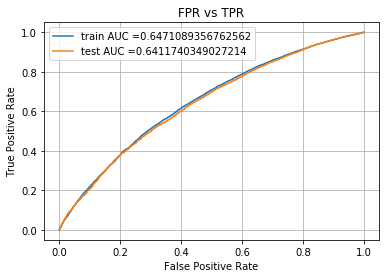

In [102]:
from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(C=best_c5, class_weight='balanced', n_jobs=-1)
neigh.fit(X_tr, y_tr)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("FPR vs TPR")
plt.grid()
plt.show()

In [103]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t5 = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_tr, predict_with_best_t(y_train_pred, best_t5)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t5)))

the maximum value of tpr*(1-fpr) 0.37026719133718383 for threshold 0.497
Train confusion matrix
[[ 4827  3278]
 [17184 28242]]
Test confusion matrix
[[ 2878  2085]
 [10472 17340]]


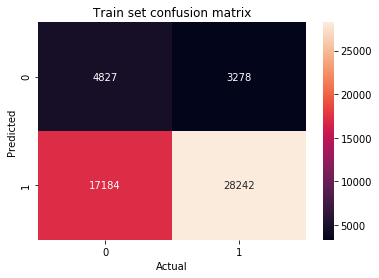

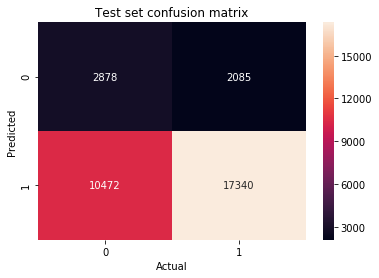

In [104]:
# Heatmap for train set confusion matrix(Select K best)
heatmap_train = sns.heatmap(confusion_matrix(y_tr, predict_with_best_t(y_train_pred,best_t5)), annot=True, fmt="d")
plt.title("Train set confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Heatmap for test set confusion matrix(Select K best)
heatmap_train = sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t5)), annot=True, fmt="d")
plt.title("Test set confusion matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

<h1>3. Conclusion</h1>

In [105]:
# Please compare all your models using Prettytable library

from prettytable import PrettyTable

model_compare = PrettyTable()
model_compare.field_names = ["Feature_sets", "Best_c_value", "Best_threshold"]
model_compare.add_row(["Bag of words", best_c1, np.round(best_t1,3)])
model_compare.add_row(["TF-IDF", best_c2, np.round(best_t2,3)])
model_compare.add_row(["Average word2vector", best_c3, np.round(best_t3,3)])
model_compare.add_row(["TF-IDF Average word2vector", best_c4, np.round(best_t4,3)])
model_compare.add_row(["Set 5", best_c5, np.round(best_t5,3)])

print(model_compare)

+----------------------------+--------------+----------------+
|        Feature_sets        | Best_c_value | Best_threshold |
+----------------------------+--------------+----------------+
|        Bag of words        |    0.001     |     0.506      |
|           TF-IDF           |     0.1      |      0.49      |
|    Average word2vector     |      1       |     0.494      |
| TF-IDF Average word2vector |     0.1      |     0.483      |
|           Set 5            |    0.001     |     0.497      |
+----------------------------+--------------+----------------+


<h5>1) The Best Hyperparameter K is found to be different in all the cases based on the features.<h5/>
2) The Best threshold value is found to be different in all the cases based on the features that are used to train the model.